# KNN

### W/o Scikit Learn


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset = [  
#  weight,sweetness,label          
    (180, 7, 'Apple'),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]
new_fruit = (165,5.5)

In [9]:
def euclidean_distance(fruit1 , fruit2):
    return np.sqrt((fruit1[0] - fruit2[0]) ** 2 +  (fruit1[1] - fruit2[1]) ** 2)


In [13]:
def knn_classify(new_fruit,dataset,k):
    distances =  []
    for weight , sweetness , label in dataset:
        dist = euclidean_distance(new_fruit,(weight,sweetness))
        distances.append((dist,label))
    
    # Important Part
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    
    vote_count = {}
    
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in vote_count:
            vote_count[label] += 1  
        else:
            vote_count[label] = 1

    predicted_label = max(vote_count, key=vote_count.get)
    return predicted_label

In [14]:
predicted_label_k3 = knn_classify(new_fruit, dataset, k=3)
print(f"The new fruit is classified as: {predicted_label_k3}")

The new fruit is classified as: Apple


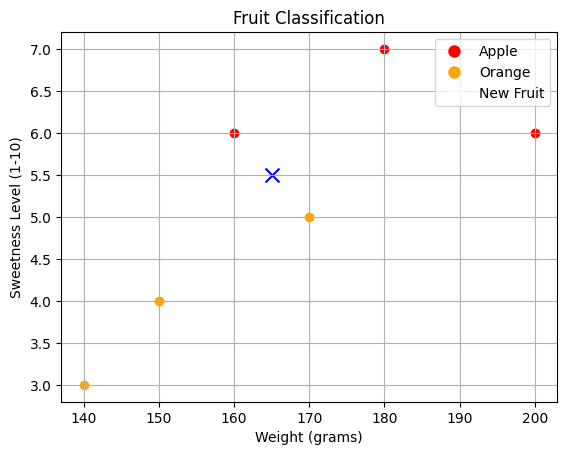

The new fruit classified with k=1 is: Orange
The new fruit classified with k=3 is: Apple
The new fruit classified with k=5 is: Orange


In [15]:
def plot_fruits(dataset, new_fruit):
    plt.figure()
    for weight, sweetness, label in dataset:
        color = 'red' if label == 'Apple' else 'orange'
        plt.scatter(weight, sweetness, color=color)
    
    plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

    plt.title('Fruit Classification')
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level (1-10)')
    
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='Apple', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Orange', markerfacecolor='orange', markersize=10),
        plt.Line2D([0], [0], marker='x', color='w', label='New Fruit', markerfacecolor='blue', markersize=10)
    ]
    plt.legend(handles=handles)
    plt.grid()
    plt.show()

plot_fruits(dataset, new_fruit)

for k in [1, 3, 5]:
    predicted_label = knn_classify(new_fruit, dataset, k)
    print(f"The new fruit classified with k={k} is: {predicted_label}")

## W / Scikit Learn



The new fruit is classified as: Orange
Euclidean distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski distances: [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


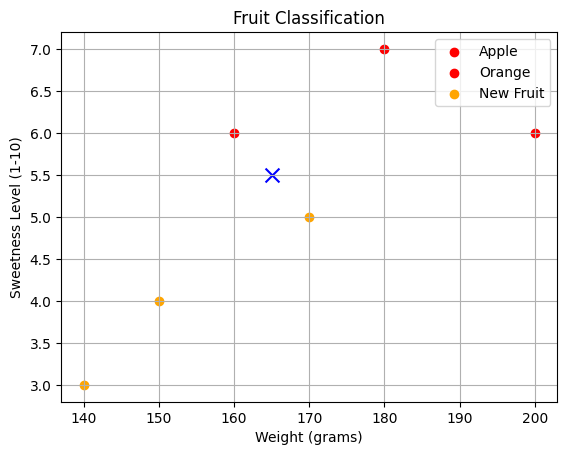

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

X = np.array([[180, 7],
              [200, 6],
              [150, 4],
              [170, 5],
              [160, 6],
              [140, 3]])
y = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'])

new_fruit = np.array([[165, 5.5]])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
predicted_label = knn.predict(new_fruit)
print(f"The new fruit is classified as: {predicted_label[0]}")

euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3)

print("Euclidean distances:", euclidean_distances.flatten())
print("Manhattan distances:", manhattan_distances.flatten())
print("Minkowski distances:", minkowski_distances.flatten())

plt.figure()
for i, label in enumerate(y):
    color = 'red' if label == 'Apple' else 'orange'
    plt.scatter(X[i, 0], X[i, 1], color=color)

plt.scatter(new_fruit[0, 0], new_fruit[0, 1], color='blue', marker='x', s=100, label='New Fruit')
plt.title('Fruit Classification')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.legend(['Apple', 'Orange', 'New Fruit'])
plt.grid()
plt.show()

